In [1]:
import glob
import pandas as pd
#訓練圖片目錄路徑
document = glob.glob("C:/Users/Big data/Desktop/pic_data/document/*.jpg")
graduation = glob.glob("C:/Users/Big data/Desktop/pic_data/graduation/*.jpg")
live = glob.glob("C:/Users/Big data/Desktop/pic_data/live/*.jpg")
data = pd.DataFrame({
    "path": document+ graduation+ live,
    "ans": [0] * len(document) + [1] * len(graduation)+ [2] * len(live)
})
data

,path,ans
0,C:/Users/Big data/Desktop/pic_data/document\0 ...,0
1,C:/Users/Big data/Desktop/pic_data/document\0.jpg,0
2,C:/Users/Big data/Desktop/pic_data/document\00...,0
3,C:/Users/Big data/Desktop/pic_data/document\00...,0
4,C:/Users/Big data/Desktop/pic_data/document\00...,0
...,...,...
1061,C:/Users/Big data/Desktop/pic_data/live\777 (3...,2
1062,C:/Users/Big data/Desktop/pic_data/live\793 (2...,2
1063,C:/Users/Big data/Desktop/pic_data/live\795 (2...,2
1064,C:/Users/Big data/Desktop/pic_data/live\798.jpg,2


In [2]:
from keras.applications.vgg16 import VGG16
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Using TensorFlow backend.
C:\Users\Big data\PycharmProjects\DB103\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Big data\PycharmProjects\DB103\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Big data\PycharmProjects\DB103\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Big data\Py

C:\Users\Big data\PycharmProjects\DB103\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Big data\PycharmProjects\DB103\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Big data\PycharmProjects\DB103\venv\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Big data\Pycharm



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [3]:
from keras.layers import Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
# Dense(256, activation="relu") -> 函式(e.g. return print)
# tensor = func(tensor)
for l in vgg.layers:
    l.trainable = False
# 1024:trainable 1024:non-trainable
x = BatchNormalization()(vgg.output)
x = Flatten()(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.25)(x)
x = Dense(3, activation="softmax")(x)
# Model(inputs=tensor, outputs=tensor)
cnn = Model(inputs=vgg.input, outputs=x)
cnn.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________

In [4]:
# trainable一定要在compile前就設定
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [5]:
from sklearn.model_selection import train_test_split
# !!! 進入訓練階段以後, list(X), dataframe(X) np.array(O)
import numpy as np
from keras.utils.np_utils import to_categorical
x = np.array(data["path"])
y = np.array(data["ans"])
y_cat = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y_cat, 
                                                    test_size=0.1)

In [6]:
# Pillow(PIL)
# 處理一張照片給你看
from keras.preprocessing.image import load_img
# 一定使用那個模型的preprocess
from keras.applications.vgg16 import preprocess_input
img = load_img(x_train[0], target_size=(224, 224)).convert("RGB")
img_np = np.array(img)
preprocess_input(img_np)

array([[[ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        ...,
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ]],

       [[ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        ...,
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ]],

       [[ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        ...,
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     ,  138.22101   ,  131.32      ],
        [ 151.061     

In [7]:
# x:圖片, y:答案, batch:取幾個
# 回傳 (原始圖片[batch], 處理圖片[batch], 答案[batch])
def get_data(x, y, batch):
    idx = np.random.randint(0, x.shape[0], batch)
    # 原本未處理的圖片
    oriimgs = []
    # Preprocess過後的圖片
    preimgs = []
    for p in x[idx]:
        img = load_img(p, target_size=(224, 224)).convert("RGB")
        img_np = np.array(img)
        oriimgs.append(img_np)
        img_pre = preprocess_input(img_np) 
        preimgs.append(img_pre)

    oriimgs = np.array(oriimgs)
    preimgs = np.array(preimgs)
    ans = y[idx]
    return (oriimgs, preimgs, ans)

In [8]:
# 訓練: train_on_batch
# 驗證: test_on_batch
for i in range(10):
    print("次數:", i + 1)
    batch = 80
    train = get_data(x_train, y_train, batch)
    train_result = cnn.train_on_batch(train[1], train[2])
    print("[Train]:", train_result)
    # 如果可以把驗證的圖片設多一點
    test_batch = 20
    test = get_data(x_test, y_test, test_batch)
    test_result = cnn.test_on_batch(test[1], test[2])
    print("[Validate]:", test_result)
    print("-" * 30)

次數: 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
[Train]: [1.7191544, 0.2875]
[Validate]: [4.3834257, 0.65]
------------------------------
次數: 2
[Train]: [3.4937394, 0.6875]
[Validate]: [8.38136, 0.45]
------------------------------
次數: 3
[Train]: [7.999868, 0.4]
[Validate]: [1.0593588, 0.9]
------------------------------
次數: 4
[Train]: [3.4817162, 0.7]
[Validate]: [0.7833748, 0.9]
------------------------------
次數: 5
[Train]: [1.2477381, 0.8625]
[Validate]: [0.7007287, 0.85]
------------------------------
次數: 6
[Train]: [1.1578121, 0.85]
[Validate]: [2.095607, 0.7]
------------------------------
次數: 7
[Train]: [3.1096196, 0.675]
[Validate]: [0.8966092, 0.85]
------------------------------
次數: 8
[Train]: [0.88623315, 0.9]
[Validate]: [1.9299122, 0.85]
------------------------------
次數: 9
[Train]: [0.77542764, 0.925]
[Validate]: [3.573983, 0.7]
------------------------------
次數: 10
[Train]: [1.5987384, 0.825]
[Validate]: [0.39853358, 0.

In [9]:
# 秀一下問題給你看
# 問題1: 怎麼全部同一個預測
# 問題2: 機率不該看到1 & 0
cnn.predict(test[1])

array([[1.00000000e+00, 1.35467274e-27, 3.68190369e-20],
       [1.00000000e+00, 8.18778836e-19, 2.49026998e-16],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 3.19829315e-29, 3.67686500e-20],
       [1.00000000e+00, 8.18778836e-19, 2.49026998e-16],
       [8.94608140e-01, 2.21377164e-07, 1.05391651e-01],
       [1.00000000e+00, 5.40381276e-27, 9.01387458e-22],
       [1.00000000e+00, 6.96230295e-29, 3.73256127e-19],
       [3.95049341e-02, 1.89153452e-14, 9.60495114e-01],
       [1.00000000e+00, 3.33503541e-37, 3.61014120e-26],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.60215795e-01, 3.39784175e-01, 1.34564160e-14],
       [1.00000000e+00, 3.34505589e-26, 1.04804247e-16],
       [1.00000000e+00, 8.18778836e-19, 2.49026998e-16],
       [6.65670232e-05, 9.54189181e-01, 4.57443297e-02],
       [1.00000000e+00, 1.74948738e-29, 1.34340739e-20],
       [9.89386082e-01, 8.83070097e-05, 1.05255079e-02],
       [8.12633349e-19, 1.00000

In [10]:
final_batch = 50
final = get_data(x_test, y_test, final_batch)
pre = cnn.predict(final[1])
cnn.evaluate(final[1], final[2])

50/50 [==============================] - 5s 95ms/step


[2.381800708770752, 0.7999999928474426]

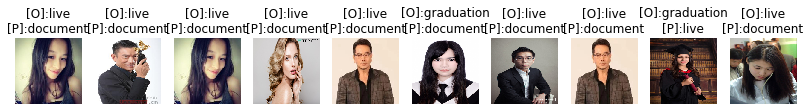

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model沒有predict_classes
# 所以我們要用argmax() 取得最大值的索引
# pre.argmax(axis=1)
idx = np.nonzero(pre.argmax(axis=1) != final[2].argmax(axis=1))[0]
# 預測錯誤的圖片
false_img = final[0][idx]
# 預測錯誤圖片的正確答案
false_answer = final[2].argmax(axis=1)[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre.argmax(axis=1)[idx]

trans = ["document", "graduation", "live"]
width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 8))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]:" + trans[false_answer[i]] + "\n[P]:" + trans[false_pre[i]]
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)


In [12]:
import pickle #pickle模組

#儲存Model(注:save資料夾要預先建立，否則會報錯)
with open('C:/Users/Big data/Desktop/pic_data/model/cnn.pickle', 'wb') as f:
    pickle.dump(cnn, f)

In [28]:
#輸入圖片目錄路徑
TEST = glob.glob("C:/Users/Big data/Desktop/pic_data/test/*.jpg")
inimg = load_img(TEST[0], target_size=(224, 224)).convert("RGB")
img_np2 = np.array(inimg)
img_pre2 = preprocess_input(img_np2)
pre2imgs = []
pre2imgs.append(img_pre2)
pre2imgs = np.array(pre2imgs)
pre2imgs

pre = cnn.predict(pre2imgs)
pre

array([[1.6411398e-02, 9.8358858e-01, 4.0142170e-10]], dtype=float32)

In [24]:
#讀取Model
with open('C:/Users/Big data/Desktop/pic_data/model/cnn.pickle', 'rb') as f:
    cnn2 = pickle.load(f)
    

In [27]:
Finally = cnn2.predict(pre2imgs)
Finally

array([[1.6411398e-02, 9.8358858e-01, 4.0142170e-10]], dtype=float32)